In [1]:
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
from redcap.project import Project
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tableone import TableOne
# import table1 as tb
from IPython.display import Markdown
from datetime import datetime
import numpy as np
from IPython.display import display
from PIL import Image
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon



import warnings
warnings.simplefilter("ignore")

sns.set_theme(style='white')

import sys
sys.path.append("/Users/golpira/Python/University of Calgary/RedCap-API-Git/RedCap_StudyLoader")
from redcap_classes import RedcapProcessor, Record, BloodDraw
from my_functions import analyze_hgb, plot_variables_over_time,my_tableone

In [2]:
load_dotenv()

### Teg-Hip
api_key_hip = os.getenv("REDCAP_TEG_HIP_API_KEY")
api_url_hip = os.getenv("REDCAP_URL")


# Step 1: Initialize processor
processor_1 = RedcapProcessor(api_url_hip, api_key_hip)

# Step 2: Fetch, process, and build Record objects
processor_1.fetch_and_process()

StudyID               redcap_event_name  \
0     TH-001  Patient Screening and Baseline   
1     TH-001               Patient Admission   
2     TH-001                   Pre-Operative   
3     TH-001                 Intra-Operative   
4     TH-001                  Post-Operative   
...      ...                             ...   
5233  TH-311                  Post-Operative   
5234  TH-311                  Post-Operative   
5235  TH-311                  Post-Operative   
5236  TH-311                  Post-Operative   
5237  TH-311                  Post-Operative   

                               redcap_repeat_instrument  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
5233  Form 2.2 - Post-Operative Bridging Anti-Coagul...   
5234                         Cumulated Ambulation Score   
5235                         Cumulated Ambulation Score   
5236                    Form 4.0 - Lab and rTEG Results   
5237                    Form 4.0 - Lab and rTEG Results   

      redcap_repeat_instance screening_date inclusion_age inclusion_fracture  \
0                        NaN     2017-12-19           Yes                Yes   
1                        NaN            NaN           NaN                NaN   
2                        NaN            NaN           NaN                NaN   
3                        NaN            NaN           NaN                NaN   
4                        NaN            NaN           NaN                NaN   
...                      ...            ...           ...                ...   
5233                     1.0            NaN           NaN                NaN   
5234                     1.0            NaN           NaN                NaN   
5235                     2.0            NaN           NaN                NaN   
5236                     1.0            NaN           NaN                NaN   
5237                     2.0            NaN           NaN                NaN   

     inclusion_consent exclusion_bleeding exclusion_malignancy  ...  \
0                  Yes                 No                   No  ...   
1                  NaN                NaN                  NaN  ...   
2                  NaN                NaN                  NaN  ...   
3                  NaN                NaN                  NaN  ...   
4                  NaN                NaN                  NaN  ...   
...                ...                ...                  ...  ...   
5233               NaN                NaN                  NaN  ...   
5234               NaN                NaN                  NaN  ...   
5235               NaN                NaN                  NaN  ...   
5236               NaN                NaN                  NaN  ...   
5237               NaN                NaN                  NaN  ...   

     date_withdrawal withdrawal_last_visit preop_time postop_time  \
0                NaN                   NaN        NaN         NaN   
1                NaN                   NaN        NaN         NaN   
2                NaN                   NaN        NaN         NaN   
3                NaN                   NaN        NaN         NaN   
4                NaN                   NaN        NaN         NaN   
...              ...                   ...        ...         ...   
5233             NaN                   NaN        NaN         NaN   
5234             NaN                   NaN        NaN         NaN   
5235             NaN                   NaN        NaN         NaN   
5236             NaN                   NaN        NaN         NaN   
5237             NaN                   NaN        NaN         NaN   

     post_discharge_time reason_withdrawal patient_withdraw_consent  \
0    

In [3]:
# ### Hip Pathway
api_key_pathway = os.getenv("REDCAP_HIP_PATHWAY_API_KEY")
api_url_pathway = os.getenv("REDCAP_URL")


processor_2 = RedcapProcessor(api_url_pathway, api_key_pathway)
processor_2.fetch_and_process()

record_id               redcap_event_name   redcap_repeat_instrument  \
0      1383-1              Admission/Baseline                        NaN   
1      1383-1  Post-Operative                                        NaN   
2      1383-1         2wk follow-up (±3 days)                        NaN   
3      1383-1         4wk follow-up (±7 days)                        NaN   
4      1383-1         6wk follow-up (±7 days)                        NaN   
..        ...                             ...                        ...   
644   1383-48  Post-Operative                        11.0 Medication Log   
645   1383-48  Post-Operative                        11.0 Medication Log   
646   1383-48  Post-Operative                  12.0 Lab and rTEG Results   
647   1383-48  Post-Operative                  12.0 Lab and rTEG Results   
648   1383-48  Post-Operative                  12.0 Lab and rTEG Results   

     redcap_repeat_instance  StudyID screen_dag_id inclusion_date inc_1 inc_2  \
0                       NaN  HPA-001           FMC     2024-02-11   Yes   Yes   
1                       NaN  HPA-001           NaN            NaN   NaN   NaN   
2                       NaN  HPA-001           NaN            NaN   NaN   NaN   
3                       NaN  HPA-001           NaN            NaN   NaN   NaN   
4                       NaN  HPA-001           NaN            NaN   NaN   NaN   
..                      ...      ...           ...            ...   ...   ...   
644                     5.0  HPA-048           NaN            NaN   NaN   NaN   
645                     6.0  HPA-048           NaN            NaN   NaN   NaN   
646                     1.0  HPA-048           NaN            NaN   NaN   NaN   
647                     2.0  HPA-048           NaN            NaN   NaN   NaN   
648                     3.0  HPA-048           NaN            NaN   NaN   NaN   

    inc_3  ... sae_classification sae_start_date sae_end_date  \
0     Yes  ...                NaN            NaN          NaN   
1     NaN  ...                NaN            NaN          NaN   
2     NaN  ...                NaN            NaN          NaN   
3     NaN  ...                NaN            NaN          NaN   
4     NaN  ...                NaN            NaN          NaN   
..    ...  ...                ...            ...          ...   
644   NaN  ...                NaN            NaN          NaN   
645   NaN  ...                NaN            NaN          NaN   
646   NaN  ...                NaN            NaN          NaN   
647   NaN  ...                NaN            NaN          NaN   
648   NaN  ...                NaN            NaN          NaN   

    sae_site_aware_date sae_grade sae_unexpected sae_attribution sae_outcome  \
0                   NaN       NaN            NaN             NaN         NaN   
1                   NaN       NaN            NaN             NaN         NaN   
2                   NaN       NaN            NaN             NaN         NaN   
3                   NaN       NaN            NaN             NaN         NaN   
4                   NaN       NaN            NaN             NaN         NaN   
..                  ...       ...            ...             ...         ...   
644                 NaN       NaN            NaN             NaN         NaN   
645                 NaN       NaN            NaN             NaN         NaN   
646                 NaN       NaN            NaN             NaN         NaN   
647                 NaN       NaN            NaN             NaN         NaN   
648                 NaN       NaN            NaN             NaN         NaN   

    serious_adverse_event_sae_complete Admission_date  
0                                  NaN            NaN  
1                                  NaN            NaN  
2                                  NaN            NaN  
3                                  NaN            NaN  
4                                  NaN            NaN  
..                                 ...  

In [ ]:
processor_2.fetch_and_process()[['StudyID','Time','redcap_event_name','redcap_repeat_instance','Draw_date']].head(20)

In [ ]:
df_pat= processor_2.fetch_and_process()

df_pat[df_pat['StudyID']=='HPA-015'][['record_id','StudyID','Draw_date','screening_status','teg_time','Hemoglobin']]


df_hip= processor_1.fetch_and_process()

df_hip[df_hip['StudyID']=='TH-198'][['StudyID','Draw_date','Time','teg_time','Hemoglobin']]

StudyID  Draw_date       Time teg_time Hemoglobin
3459  TH-198        NaT        NaN    00:00        NaN
3460  TH-198 2021-10-03  Admission    00:00        112
3461  TH-198        NaT        NaN    00:00        NaN
3462  TH-198        NaT        NaN    00:00        NaN
3463  TH-198        NaT        NaN    00:00        NaN
3464  TH-198 2021-10-18      Week2    00:00         84
3465  TH-198 2021-11-01      Week4    00:00         98
3466  TH-198 2021-11-16      Week6    00:00        NaN
3467  TH-198 2021-12-21     Month3    00:00        NaN
3468  TH-198        NaT        NaN    00:00        NaN
3469  TH-198 2021-10-04     Pre-Op    00:00        NaN
3470  TH-198        NaT        NaN    00:00        NaN
3471  TH-198        NaT        NaN    00:00        NaN
3472  TH-198        NaT        NaN    00:00        NaN
3473  TH-198        NaT        NaN    00:00        NaN
3474  TH-198 2021-10-05       POD1    00:00         81
3475  TH-198 2021-10-09       POD5    00:00         92
3476  TH-198 2021-10-11       POD7    00:00         98
3477  TH-198 2021-10-07       POD3    00:00         95

In [ ]:

print('=========================')
print(processor_2.get_patient_demographics('HPA-009'))

StudyID                       HPA-009
Age                                92
Sex                            Female
BMI                              25.6
Injury_date       2024-04-09 16:50:00
Admission_date                   None
Surgery_date      2024-04-11 08:40:00
Pre_op_doac                       Yes
VTE_type                         None
dtype: object


In [ ]:
df_hip_demo=processor_1.get_all_demographics()
df_pathway_demo=processor_2.get_all_demographics()

display(df_hip_demo)
# display(df_pathway_demo)


StudyID   Age     Sex     BMI       Injury_date    Admission_date  \
0    TH-001    76    Male  26.975  2017-12-19 11:00  2017-12-19 15:00   
1    TH-002    89  Female  18.365  2017-12-19 14:27  2017-12-19 15:00   
2    TH-003    65  Female  24.417  2018-01-29 14:45  2018-01-29 16:18   
3    TH-004    76    Male    None  2018-03-31 11:30              None   
4    TH-005    75  Female  27.175  2018-04-04 13:45  2018-04-04 16:13   
5    TH-006    72    Male  19.233  2018-04-06 01:30  2018-04-06 07:22   
6    TH-007    83  Female  27.435  2018-07-05 18:45  2018-07-05 20:05   
7    TH-008    85    Male   26.91  2018-07-06 06:00  2018-07-06 12:31   
8    TH-009    83  Female  20.895  2018-07-06 21:30  2018-07-06 22:50   
9    TH-010    86  Female    None  2018-07-17 14:00  2018-07-17 16:45   
10   TH-011    92  Female  19.867  2018-07-19 06:40  2018-07-19 12:55   
11   TH-012    60    Male  30.814  2018-07-22 13:30  2018-07-22 14:30   
12   TH-013    92  Female  16.461  2018-07-27 21:00  2018-07-27 21:54   
13   TH-014    81  Female  21.927  2018-07-29 10:00  2018-07-29 14:13   
14   TH-015    70  Female  49.483  2018-07-30 11:00  2018-07-30 12:11   
15   TH-016    61  Female  19.995  2018-07-30 16:45  2018-07-30 23:02   
16   TH-017    76  Female  20.803  2018-08-05 20:00  2018-08-06 01:08   
17   TH-018    87  Female  22.012  2018-08-10 22:00  2018-08-11 11:55   
18   TH-019    58  Female  18.011  2018-08-17 17:00  2018-08-17 17:56   
19   TH-020    85  Female  25.508  2018-08-19 05:45  2018-08-19 06:46   
20   TH-021    57  Female  23.172  2018-08-21 15:30  2018-08-21 17:37   
21   TH-022    65  Female    None  2018-08-28 14:00  2018-08-28 14:22   
22   TH-023    95  Female   19.26  2018-08-31 19:15  2018-08-31 20:15   
23   TH-024    71  Female  26.792  2018-08-31 17:00  2018-08-31 18:47   
24   TH-025    85  Female  22.499  2018-08-31 18:30  2018-09-01 00:05   
25   TH-026    84  Female  20.371  2018-09-06 09:00  2018-09-06 10:59   
26   TH-027    85  Female  24.961  2018-09-07 05:30  2018-09-07 10:18   
27   TH-028    91  Female  31.093  2018-09-07 08:30  2018-09-07 09:44   
28   TH-029    88  Female   24.21  2018-09-08 15:00  2018-09-08 15:30   
29   TH-030    95  Female  20.119  2018-09-08 16:00  2018-09-08 16:35   
30   TH-031    82  Female  24.237  2018-09-17 08:00  2018-09-17 09:59   
31   TH-032    85  Female  20.119  2018-09-20 10:00  2018-09-20 12:02   
32   TH-033    67  Female  39.605  2018-09-21 08:30  2018-09-21 09:27   
33   TH-034    88  Female  20.576  2018-09-23 22:00  2018-09-23 23:57   
34   TH-035    85  Female  20.784  2018-09-26 15:00  2018-09-26 22:20   
35   TH-036    67  Female  25.544  2018-09-27 15:00  2018-09-27 17:34   
36   TH-037    91  Female    None  2018-10-05 04:30  2018-10-05 05:03   
37   TH-038    83    Male  17.678  2018-10-09 15:00  2018-10-09 16:51   
38   TH-039    87    Male   25.11  2018-10-12 11:30  2018-10-12 13:01   
39   TH-040    98  Female    None  2018-10-24 04:30  2018-10-24 06:18   
40   TH-041    81  Female  24.129  2018-10-26 16:30  2018-10-26 18:00   
41   TH-042    84    Male  26.608  2018-10-28 13:00  2018-10-28 16:03   
42   TH-043    67  Female  18.305  2018-10-28 19:00  2018-10-29 00:00   
43   TH-044    60    Male  23.675  2018-10-29 16:00  2018-10-29 22:45   
44   TH-045    59    Male  26.581  2018-10-31 12:00  2018-10-31 13:05   
45   TH-046    83    Male  24.344  2018-11-09 17:00  2018-11-09 18:42   
46   TH-047    64  Female  28.407  2018-11-10 15:00  2018-11-10 18:43   
47   TH-048    64  Female  27.673  2018-11-10 14:00  2018-11-10 17:04   
48   TH-049    86  Female  20.119  2018-11-13 20:04  2018-11-13 22:11   
49   TH-050    83  Female  17.165  2018-11-21 23:00  2018-11-22 01:20   
50   TH-051    71  Female  15.965  2018-12-03 15:00  2018-12-03 17:02   
51   TH-052    95  Female  21.927  2018-12-09 14:00  2018-12-09 15:15   
52   TH-053    88  Female  28.192  2019-01-05 15:00  2019-01-05 17:01   
53   TH-054    96  Female  20.273  2019-01-05 14:45  2019-01-0

In [ ]:
# Get demographics for patients
print(processor_1.get_patient_demographics('TH-002'))

StudyID                     TH-002
Age                             89
Sex                         Female
BMI                         18.365
Injury_date       2017-12-19 14:27
Admission_date    2017-12-19 15:00
Surgery_date      2017-12-22 11:53
Pre_op_doac                   None
VTE_type                      None
dtype: object


In [ ]:
# Get blood draws for patient TH-002
display(processor_1.get_patient_blood_draws('TH-002'))
display(processor_2.get_patient_blood_draws('HPA-009'))

StudyID       Time Hemoglobin Creatinine R_time K_time Alpha_Angle    MA  \
0   TH-002  Admission        158         56    0.4    1.1        75.1  64.3   
1   TH-002      Week2        NaN        NaN    0.7    0.8        78.4  69.6   
2   TH-002      Week6        NaN        NaN    0.8    1.3        71.9  62.8   
3   TH-002     Month3        NaN        NaN    0.9    1.3        72.0  62.9   
4   TH-002       PFD1        NaN        NaN    0.3    1.4        73.5  61.5   
5   TH-002       PFD2        NaN        NaN    0.5    1.2        74.6  65.0   
6   TH-002       POD1        NaN        NaN    0.7    1.1        74.8  66.5   
7   TH-002       POD2        114         50    0.6    1.1        75.7  65.7   
8   TH-002       POD3        105         45    0.7    1.0        76.7  66.2   
9   TH-002       POD4        101         44    0.7    0.9        76.3  68.3   
10  TH-002       POD5        101        NaN    0.7    0.8        77.5  68.8   

   LY30    ACT  Draw_date  time_from_injury_to_draw_hours  
0   0.0   87.9 2017-12-20                            9.55  
1   0.0  116.0 2018-01-03                          345.55  
2   0.1  125.3 2018-02-05                         1137.55  
3   NaN  134.7 2018-03-19                         2145.55  
4   0.0   78.5 2017-12-20                            9.55  
5   0.0   97.3 2017-12-21                           33.55  
6   0.0  116.0 2017-12-22                           57.55  
7   0.2  106.6 2017-12-23                           81.55  
8   0.5  116.0 2017-12-24                          105.55  
9   0.0  116.0 2017-12-25                          129.55  
10  0.3  116.0 2017-12-26                          153.55

StudyID         Time Hemoglobin Creatinine R_time K_time Alpha_Angle    MA  \
0  HPA-009        Week2        NaN        NaN    0.7    0.8        79.2  69.3   
1  HPA-009    Admission        NaN        NaN    0.5    1.2        75.5  61.4   
2  HPA-009     Pre-draw        121         48    NaN    NaN         NaN   NaN   
3  HPA-009  4 hr Pre-OP        NaN        NaN    0.4    0.9        78.8  64.3   
4  HPA-009         POD1         88        NaN    0.4    0.8        78.6  64.2   
5  HPA-009         POD3         87        NaN    0.5    0.8        79.3  68.9   
6  HPA-009         POD5         91        NaN    0.3    0.7        80.3  69.9   
7  HPA-009         POD7         86        NaN    0.3    0.8        79.2  68.1   
8  HPA-009  Unscheduled        NaN        NaN    0.6    0.8        78.2  67.0   

  LY30    ACT           Draw_date  time_from_injury_to_draw_hours  
0  0.0  116.0 2024-04-22 07:00:00                      302.166667  
1  0.1   97.3 2024-04-10 09:00:00                       16.166667  
2  NaN    NaN 2024-04-09 20:52:00                        4.033333  
3  0.1   87.9 2024-04-11 07:00:00                       38.166667  
4  0.1   87.9 2024-04-12 07:00:00                       62.166667  
5  0.0   97.3 2024-04-14 08:00:00                      111.166667  
6  0.0   78.5 2024-04-16 07:00:00                      158.166667  
7  0.0   78.5 2024-04-18 07:00:00                      206.166667  
8  0.0  106.6 2024-07-30 10:30:00                     2681.666667

In [ ]:
# Get all blood draws for all patients

display(processor_1.get_all_blood_draws())
display(processor_2.get_all_blood_draws())

StudyID              Time Hemoglobin Creatinine R_time K_time  \
0     TH-001         Admission        165        142    0.4    1.2   
1     TH-001             Week2        NaN        NaN    0.6    0.7   
2     TH-001             Week6        NaN        NaN    0.5    0.7   
3     TH-001            Month3        NaN        NaN    0.7    0.7   
4     TH-001              PFD1        NaN        NaN    0.2    0.8   
5     TH-001              POD1        NaN        NaN    0.4    0.8   
6     TH-001              POD2        NaN        NaN    0.6    0.8   
7     TH-001              POD3        NaN        NaN    0.3    0.7   
8     TH-001              POD4        NaN        NaN    0.6    0.7   
9     TH-001              POD5        NaN        NaN    0.7    0.8   
10    TH-002         Admission        158         56    0.4    1.1   
11    TH-002             Week2        NaN        NaN    0.7    0.8   
12    TH-002             Week6        NaN        NaN    0.8    1.3   
13    TH-002            Month3        NaN        NaN    0.9    1.3   
14    TH-002              PFD1        NaN        NaN    0.3    1.4   
15    TH-002              PFD2        NaN        NaN    0.5    1.2   
16    TH-002              POD1        NaN        NaN    0.7    1.1   
17    TH-002              POD2        114         50    0.6    1.1   
18    TH-002              POD3        105         45    0.7    1.0   
19    TH-002              POD4        101         44    0.7    0.9   
20    TH-002              POD5        101        NaN    0.7    0.8   
21    TH-003         Admission        142         69    0.7    1.3   
22    TH-003             Week2        NaN        NaN    0.4    0.5   
23    TH-003             Week6        NaN        NaN    1.2    0.9   
24    TH-003            Month3        NaN        NaN    1.3    1.2   
25    TH-003              POD1        138         57    0.7    2.4   
26    TH-003              POD2        114         46    0.3    1.2   
27    TH-003              POD3        101         56    0.5    1.8   
28    TH-003              POD4        NaN        NaN    0.3    0.7   
29    TH-003              POD5        NaN        NaN    0.4    0.7   
30    TH-004         Admission        NaN        NaN    0.8    1.0   
31    TH-004              PFD1        NaN        NaN    0.7    1.0   
32    TH-005         Admission        147         74    0.6    1.8   
33    TH-005             Week2        NaN        NaN    0.8    0.7   
34    TH-005             Week6        NaN        NaN    0.6    1.2   
35    TH-005            Month3        NaN        NaN    0.5    1.2   
36    TH-005              PFD1        NaN        NaN    0.7    1.4   
37    TH-005              PFD2        NaN        NaN    0.5    1.0   
38    TH-005              POD1        NaN        NaN    0.4    0.8   
39    TH-005              POD2        111         58    0.6    0.8   
40    TH-005              POD3         98         64    0.5    0.8   
41    TH-005              POD4         90         68    0.5    0.7   
42    TH-005              POD5         87        NaN    0.6    0.7   
43    TH-006         Admission        152         52    0.7    2.2   
44    TH-006             Week2        NaN        NaN    0.6    0.8   
45    TH-006             Week6        NaN        NaN    0.6    1.0   
46    TH-006            Month3        NaN        NaN    0.7    1.5   
47    TH-006              PFD1        NaN        NaN    0.6    1.8   
48    TH-006              POD1        106         53    0.6    1.6   
49    TH-006              POD2        NaN        NaN    0.5    1.2   
50    TH-006              POD3         91         50    0.6    1.1   
51    TH-006              POD4        103        NaN    0.4    0.9   
52    TH-006              POD5        NaN        NaN    0.5    0.9   
53    TH-007         Admission        144         95    0.7    1.3   
54    TH-007             Week2        NaN        NaN    0.7    0.8   
55    TH-007             Week6        NaN        NaN    0.5    0.8   
56    TH-007   

StudyID               Time Hemoglobin Creatinine R_time K_time  \
0    HPA-001              Week2        NaN        NaN    0.3    0.7   
1    HPA-001          Admission        144         80    0.6    1.3   
2    HPA-001        4 hr Pre-OP        NaN        NaN    0.6    1.1   
3    HPA-001               PFD1        155         67    NaN    NaN   
4    HPA-001               POD1        139         80    0.5    1.7   
5    HPA-001               POD3        104         62    0.3    0.8   
6    HPA-001               POD5        NaN        NaN    0.3    0.8   
7    HPA-001               POD7        NaN        NaN    0.5    0.6   
8    HPA-004              Week2        NaN        NaN    0.3    0.8   
9    HPA-004              Week4        NaN        NaN    0.4    0.9   
10   HPA-004              Week6        NaN        NaN    0.5    1.1   
11   HPA-004             Month3        NaN        NaN    0.5    1.3   
12   HPA-004          Admission        NaN        NaN    0.4    1.2   
13   HPA-004           Pre-draw        139         58    NaN    NaN   
14   HPA-004               POD1        121         57    0.7    1.1   
15   HPA-004               POD3        117         64    0.4    0.8   
16   HPA-008              Week2        NaN        NaN    0.4    0.7   
17   HPA-008              Week4        NaN        NaN    0.3    0.8   
18   HPA-008              Week6        NaN        NaN    0.4    0.9   
19   HPA-008          Admission        NaN        NaN    0.4    1.1   
20   HPA-008           Pre-draw        113         65    NaN    NaN   
21   HPA-008               POD1         99        NaN    0.9    1.0   
22   HPA-008               POD3         91        NaN    0.5    1.2   
23   HPA-008               POD5         95        NaN    0.5    0.9   
24   HPA-008               POD7         96        NaN    0.4    0.8   
25   HPA-009              Week2        NaN        NaN    0.7    0.8   
26   HPA-009          Admission        NaN        NaN    0.5    1.2   
27   HPA-009           Pre-draw        121         48    NaN    NaN   
28   HPA-009        4 hr Pre-OP        NaN        NaN    0.4    0.9   
29   HPA-009               POD1         88        NaN    0.4    0.8   
30   HPA-009               POD3         87        NaN    0.5    0.8   
31   HPA-009               POD5         91        NaN    0.3    0.7   
32   HPA-009               POD7         86        NaN    0.3    0.8   
33   HPA-009        Unscheduled        NaN        NaN    0.6    0.8   
34   HPA-010              Week2        NaN        NaN    0.2    0.7   
35   HPA-010          Admission        NaN        NaN    0.7    0.9   
36   HPA-010           Pre-draw        112        213    NaN    NaN   
37   HPA-010        4 hr Pre-OP         87        187    0.4    0.8   
38   HPA-010               POD1         80        NaN    0.3    0.8   
39   HPA-010               POD3         84        218    0.4    0.7   
40   HPA-010               POD5         77        NaN    0.4    0.7   
41   HPA-010               POD7         86        197    0.3    0.6   
42   HPA-012              Week2        NaN        NaN    0.5    0.8   
43   HPA-012              Week4        NaN        NaN    0.4    0.8   
44   HPA-012              Week6        NaN        NaN    0.7    0.9   
45   HPA-012             Month3        NaN        NaN    0.8    0.8   
46   HPA-012          Admission        147         85    0.7    1.3   
47   HPA-012        4 hr Pre-OP        NaN        NaN    0.5    1.2   
48   HPA-012               POD1        124         85    0.3    0.9   
49   HPA-012               POD3        116         73    0.5    0.8   
50   HPA-012               POD5        NaN        NaN    0.7    0.8   
51   HPA-012               POD7        NaN        NaN    0.5    0.7   
52   HPA-014              Week2         81        NaN    0.6    0.8   
53   HPA-014              Week4         87        NaN    0.7    0.9   
54   HPA-014              Week6        111         34    0.4    1.1   
55   HPA-014             Mont

In [ ]:
print(processor_1.get_patient_demographics('TH-244'))

StudyID                     TH-244
Age                             88
Sex                           Male
BMI                         20.343
Injury_date       2022-12-10 19:30
Admission_date    2022-12-11 12:34
Surgery_date      2022-12-13 09:00
Pre_op_doac                   None
VTE_type                      None
dtype: object


In [ ]:
display(processor_1.get_patient_blood_draws('TH-227'))

StudyID       Time Hemoglobin Creatinine R_time K_time Alpha_Angle    MA  \
0  TH-227  Admission        151        NaN    0.5    1.9        69.3  55.8   
1  TH-227      Week2        NaN        NaN    0.7    0.8        77.8  69.6   
2  TH-227      Week4        NaN        NaN    0.7    1.2        76.2  63.1   
3  TH-227      Week6        NaN        NaN    0.6    1.2        75.6  63.4   
4  TH-227     Month3        NaN        NaN    0.6    1.4        74.3  61.5   
5  TH-227       PFD1        143         64    0.5    1.9        72.8  56.3   
6  TH-227       POD1        143         64    0.7    1.4        74.9  62.5   
7  TH-227       POD3        130        NaN    0.3    0.8        78.8  66.7   
8  TH-227       POD5        131        NaN    0.5    0.8        79.7  69.0   

  LY30    ACT  Draw_date  time_from_injury_to_draw_hours  
0  2.9   97.3 2022-06-02                           10.55  
1  0.6  116.0 2022-06-20                          442.55  
2  1.8  116.0 2022-07-04                          778.55  
3  1.4  106.6 2022-07-18                         1114.55  
4  1.4  106.6 2022-08-29                         2122.55  
5  2.5   97.3 2022-06-03                           34.55  
6  1.0  116.0 2022-06-04                           58.55  
7  1.6   78.5 2022-06-06                          106.55  
8  0.9   97.3 2022-06-08                          154.55

In [ ]:
df_demo=pd.concat([df_hip_demo,df_pathway_demo]).reset_index(drop=True)


df_demo_oac = df_demo[df_demo['Pre_op_doac'] == 'Yes']
df_blood_draws = pd.concat([processor_1.get_all_blood_draws(), processor_2.get_all_blood_draws()]).drop_duplicates().reset_index(drop=True)

# ONLY DOAC - Hemoglobin drop

In [ ]:
df_blood_draws_oac = df_blood_draws[df_blood_draws['StudyID'].isin(df_demo_oac['StudyID'])]

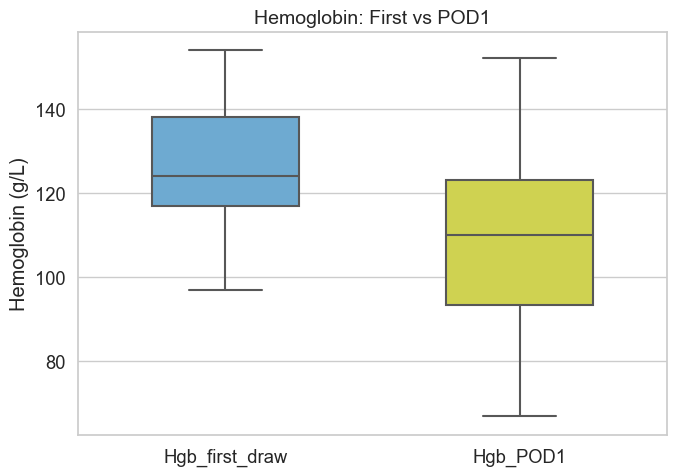

Wilcoxon W       p-value  Median Difference (POD1 - First)  95% CI Lower  \
0        21.0  3.968166e-07                             -18.0         -28.0   

   95% CI Upper  
0          -9.0

In [ ]:
analyze_hgb(df_blood_draws_oac, pod_time="POD1")

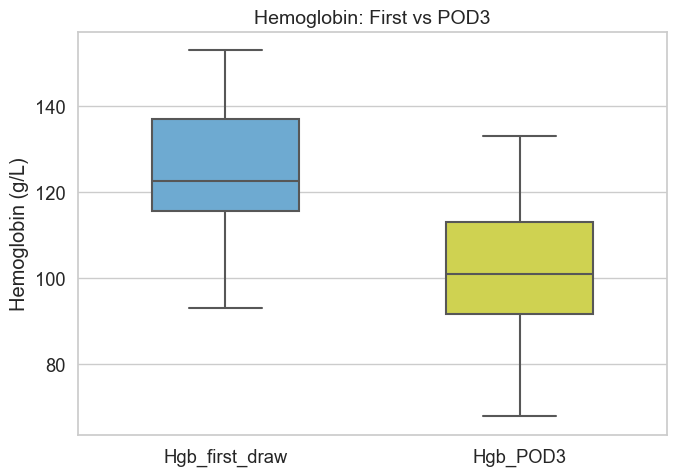

Wilcoxon W       p-value  Median Difference (POD3 - First)  95% CI Lower  \
0         7.0  1.382432e-10                             -24.5         -29.0   

   95% CI Upper  
0         -21.5

In [ ]:
analyze_hgb(df_blood_draws_oac, pod_time="POD3")

In [ ]:
df_blood_draws[df_blood_draws['Time']=='Week2'].sort_values('StudyID')

StudyID   Time Hemoglobin Creatinine R_time K_time Alpha_Angle    MA  \
2369  HPA-001  Week2        NaN        NaN    0.3    0.7        82.0  73.1   
2377  HPA-004  Week2        NaN        NaN    0.3    0.8        78.3  68.0   
2385  HPA-008  Week2        NaN        NaN    0.4    0.7        80.4  70.8   
2394  HPA-009  Week2        NaN        NaN    0.7    0.8        79.2  69.3   
2403  HPA-010  Week2        NaN        NaN    0.2    0.7        81.8  69.8   
2411  HPA-012  Week2        NaN        NaN    0.5    0.8        78.2  67.6   
2421  HPA-014  Week2         81        NaN    0.6    0.8        78.5  65.8   
2445  HPA-017  Week2        NaN        NaN    0.4    0.8        79.4  68.8   
2457  HPA-019  Week2        NaN        NaN    0.7    0.7        82.0  72.4   
2467  HPA-020  Week2        NaN        NaN    NaN    NaN         NaN   NaN   
2479  HPA-021  Week2        NaN        NaN    0.4    0.8        79.8  71.2   
2489  HPA-022  Week2        117         85    0.3    0.8        79.2  68.2   
2505  HPA-026  Week2         95        NaN    0.5    0.8        79.5  68.9   
2513  HPA-028  Week2        NaN        NaN    0.3    0.5        83.1  75.1   
2522  HPA-029  Week2        NaN        NaN    NaN    NaN         NaN   NaN   
2532  HPA-030  Week2        NaN        NaN    0.4    0.6        81.5  71.7   
2539  HPA-032  Week2        NaN        NaN    NaN    NaN         NaN   NaN   
2557  HPA-035  Week2        NaN        NaN    0.6    1.1        76.4  65.4   
2576  HPA-038  Week2        NaN        NaN    0.8    0.8        78.9  67.8   
2586  HPA-039  Week2        NaN        NaN    0.5    0.8        80.2  71.1   
2596  HPA-042  Week2        NaN        NaN    0.6    0.7        81.1  72.3   
2607  HPA-043  Week2        NaN        NaN    NaN    NaN         NaN   NaN   
1      TH-001  Week2        NaN        NaN    0.6    0.7        81.7  72.1   
11     TH-002  Week2        NaN        NaN    0.7    0.8        78.4  69.6   
22     TH-003  Week2        NaN        NaN    0.4    0.5        83.7  77.9   
33     TH-005  Week2        NaN        NaN    0.8    0.7        80.8  72.8   
44     TH-006  Week2        NaN        NaN    0.6    0.8        79.5  70.7   
54     TH-007  Week2        NaN        NaN    0.7    0.8        79.3  70.4   
64     TH-008  Week2        NaN        NaN    0.6    0.8        80.7  70.6   
74     TH-009  Week2        NaN        NaN    0.4    0.6        82.7  72.9   
92     TH-012  Week2        NaN        NaN    0.4    0.7        81.2  72.4   
101    TH-013  Week2        NaN        NaN    0.7    0.7        81.8  75.2   
112    TH-014  Week2        NaN        NaN    0.5    0.6        82.9  75.5   
122    TH-015  Week2        NaN        NaN    0.6    0.7        82.2  74.9   
133    TH-016  Week2        NaN        NaN    0.4    0.9        77.8  67.5   
141    TH-017  Week2        NaN        NaN    0.5    0.8        78.6  70.5   
150    TH-018  Week2        NaN        NaN    0.3    0.9        77.7  67.5   
159    TH-019  Week2        NaN        NaN    0.8    0.8        79.2  70.6   
166    TH-020  Week2        139        117    0.2    0.8        79.8  71.1   
174    TH-021  Week2        NaN        NaN    0.5    0.9        77.4  68.3   
181    TH-023  Week2        NaN        NaN    0.7    0.8        79.4  69.5   
189    TH-024  Week2        NaN        NaN    0.5    0.8        79.0  67.3   
198    TH-025  Week2        NaN        NaN    0.3    0.8        78.3  67.6   
207    TH-026  Week2        NaN        NaN    0.4    0.6        83.0  72.9   
216    TH-027  Week2        NaN        NaN    0.8    0.7        81.2  72.7   
224    TH-028  Week2        NaN        NaN    0.4    0.7        80.2  70.6   
234    TH-029  Week2        NaN        NaN    0.4    0.6        83.0  73.2   
246    TH-031  Week2        NaN        NaN    0.6    0.7        81.7  73.9   
255    TH-032  Week2        NaN        NaN    0.6    0.9        77.1  67.5   
265    TH-033  Week2        NaN        NaN    0.7    0.8        78.1  68.8   
274    TH-034  Week2        

In [ ]:
df_blood_draws

StudyID               Time Hemoglobin Creatinine R_time K_time  \
0      TH-001          Admission        165        142    0.4    1.2   
1      TH-001              Week2        NaN        NaN    0.6    0.7   
2      TH-001              Week6        NaN        NaN    0.5    0.7   
3      TH-001             Month3        NaN        NaN    0.7    0.7   
4      TH-001               PFD1        NaN        NaN    0.2    0.8   
5      TH-001               POD1        NaN        NaN    0.4    0.8   
6      TH-001               POD2        NaN        NaN    0.6    0.8   
7      TH-001               POD3        NaN        NaN    0.3    0.7   
8      TH-001               POD4        NaN        NaN    0.6    0.7   
9      TH-001               POD5        NaN        NaN    0.7    0.8   
10     TH-002          Admission        158         56    0.4    1.1   
11     TH-002              Week2        NaN        NaN    0.7    0.8   
12     TH-002              Week6        NaN        NaN    0.8    1.3   
13     TH-002             Month3        NaN        NaN    0.9    1.3   
14     TH-002               PFD1        NaN        NaN    0.3    1.4   
15     TH-002               PFD2        NaN        NaN    0.5    1.2   
16     TH-002               POD1        NaN        NaN    0.7    1.1   
17     TH-002               POD2        114         50    0.6    1.1   
18     TH-002               POD3        105         45    0.7    1.0   
19     TH-002               POD4        101         44    0.7    0.9   
20     TH-002               POD5        101        NaN    0.7    0.8   
21     TH-003          Admission        142         69    0.7    1.3   
22     TH-003              Week2        NaN        NaN    0.4    0.5   
23     TH-003              Week6        NaN        NaN    1.2    0.9   
24     TH-003             Month3        NaN        NaN    1.3    1.2   
25     TH-003               POD1        138         57    0.7    2.4   
26     TH-003               POD2        114         46    0.3    1.2   
27     TH-003               POD3        101         56    0.5    1.8   
28     TH-003               POD4        NaN        NaN    0.3    0.7   
29     TH-003               POD5        NaN        NaN    0.4    0.7   
30     TH-004          Admission        NaN        NaN    0.8    1.0   
31     TH-004               PFD1        NaN        NaN    0.7    1.0   
32     TH-005          Admission        147         74    0.6    1.8   
33     TH-005              Week2        NaN        NaN    0.8    0.7   
34     TH-005              Week6        NaN        NaN    0.6    1.2   
35     TH-005             Month3        NaN        NaN    0.5    1.2   
36     TH-005               PFD1        NaN        NaN    0.7    1.4   
37     TH-005               PFD2        NaN        NaN    0.5    1.0   
38     TH-005               POD1        NaN        NaN    0.4    0.8   
39     TH-005               POD2        111         58    0.6    0.8   
40     TH-005               POD3         98         64    0.5    0.8   
41     TH-005               POD4         90         68    0.5    0.7   
42     TH-005               POD5         87        NaN    0.6    0.7   
43     TH-006          Admission        152         52    0.7    2.2   
44     TH-006              Week2        NaN        NaN    0.6    0.8   
45     TH-006              Week6        NaN        NaN    0.6    1.0   
46     TH-006             Month3        NaN        NaN    0.7    1.5   
47     TH-006               PFD1        NaN        NaN    0.6    1.8   
48     TH-006               POD1        106         53    0.6    1.6   
49     TH-006               POD2        NaN        NaN    0.5    1.2   
50     TH-006               POD3         91         50    0.6    1.1   
51     TH-006               POD4        103        NaN    0.4    0.9   
52     TH-006               POD5        NaN        NaN    0.5    0.9   
53     TH-007          Admission        144         95    0.7    1.3   
54     TH-007              Week2        NaN   

In [ ]:
df_blood_draws[df_blood_draws['Time'].isin(['Admission','Pre-Op','PFD1','Pre-Op','PFD2','4 hr Pre-OP','Pre-draw','PFD3','PFD4'])].head(10)

StudyID       Time Hemoglobin Creatinine R_time K_time Alpha_Angle    MA  \
0   TH-001  Admission        165        142    0.4    1.2        76.2  62.7   
4   TH-001       PFD1        NaN        NaN    0.2    0.8        78.4  63.3   
10  TH-002  Admission        158         56    0.4    1.1        75.1  64.3   
14  TH-002       PFD1        NaN        NaN    0.3    1.4        73.5  61.5   
15  TH-002       PFD2        NaN        NaN    0.5    1.2        74.6  65.0   
21  TH-003  Admission        142         69    0.7    1.3        72.9  61.5   
30  TH-004  Admission        NaN        NaN    0.8    1.0        75.7  66.7   
31  TH-004       PFD1        NaN        NaN    0.7    1.0        77.1  66.7   
32  TH-005  Admission        147         74    0.6    1.8        72.2  59.3   
36  TH-005       PFD1        NaN        NaN    0.7    1.4        74.4  62.1   

   LY30    ACT  Draw_date  time_from_injury_to_draw_hours VTE_type Pre_op_doac  
0   0.0   87.9 2017-12-19                          -11.00       No          No  
4   0.0   69.2 2017-12-20                           13.00       No          No  
10  0.0   87.9 2017-12-20                            9.55       No          No  
14  0.0   78.5 2017-12-20                            9.55       No          No  
15  0.0   97.3 2017-12-21                           33.55       No          No  
21  0.4  116.0 2018-01-29                          -14.75      DVT          No  
30  0.0  125.3 2018-03-31                          -11.50       No         Yes  
31  0.0  116.0 2018-04-01                           12.50       No         Yes  
32  0.0  106.6 2018-04-04                          -13.75       No          No  
36  0.1  116.0 2018-04-05                           10.25       No          No

## Created two columns to pick depending on if we want pre-op closest to injury or if we want pre-op closest tto surgery

In [ ]:
preop_timepoints = ['Admission','Pre-Op','PFD1','Pre-Op','PFD2','4 hr Pre-OP','Pre-draw','PFD3','PFD4']

# # Ensure the 'Time' column is string
# df_blood_draws['Time'] = df_blood_draws['Time'].astype(str)

# Initialize new columns
df_blood_draws['closest_to_injury'] = 0
df_blood_draws['closest_to_surgery'] = 0

# Loop over each patient
for patient_id, group in df_blood_draws.groupby('StudyID'):
    preop_draws = group[group['Time'].isin(preop_timepoints)].copy()
    
    if not preop_draws.empty:
        # Closest to injury
        closest_idx = preop_draws['time_from_injury_to_draw_hours'].idxmin()
        df_blood_draws.loc[closest_idx, 'closest_to_injury'] = 'Yes'
        
        # Farthest from injury
        farthest_idx = preop_draws['time_from_injury_to_draw_hours'].idxmax()
        df_blood_draws.loc[farthest_idx, 'closest_to_surgery'] = 'Yes'



# Now pick the Pre-op time that we want:
df_blood_draws['Time']=np.where(df_blood_draws['closest_to_surgery']=='Yes','Pre_op',df_blood_draws['Time']) #closest_to_surgery

In [ ]:
df_blood_draws[df_blood_draws['closest_to_surgery']=='Yes'].head()

StudyID    Time Hemoglobin Creatinine R_time K_time Alpha_Angle    MA  \
4.0   TH-001  Pre_op        NaN        NaN    0.2    0.8        78.4  63.3   
15.0  TH-002  Pre_op        NaN        NaN    0.5    1.2        74.6  65.0   
21.0  TH-003  Pre_op        142         69    0.7    1.3        72.9  61.5   
31.0  TH-004  Pre_op        NaN        NaN    0.7    1.0        77.1  66.7   
37.0  TH-005  Pre_op        NaN        NaN    0.5    1.0        77.5  63.7   

     LY30    ACT  Draw_date  time_from_injury_to_draw_hours VTE_type  \
4.0   0.0   69.2 2017-12-20                           13.00       No   
15.0  0.0   97.3 2017-12-21                           33.55       No   
21.0  0.4  116.0 2018-01-29                          -14.75      DVT   
31.0  0.0  116.0 2018-04-01                           12.50       No   
37.0  0.3   97.3 2018-04-06                           34.25       No   

     Pre_op_doac closest_to_injury closest_to_surgery  
4.0           No                 0                Yes  
15.0          No                 0                Yes  
21.0          No               Yes                Yes  
31.0         Yes                 0                Yes  
37.0          No                 0                Yes

In [ ]:
# df_demo=df_demo[df_demo['StudyID']!='HPA-048']
columns = ['Sex', 'Age', 'BMI','VTE_type','VTE']
groupby = 'Pre_op_doac'
categorical = ['Sex','VTE_type','VTE']

nonnormal=['BMI'] 
TableOne(df_demo, columns, categorical, nonnormal=nonnormal, groupby=groupby, pval=True, htest_name=True, include_null=False)

Grouped by Pre_op_doac                                                                                                         
                                          Missing           Overall                No               Yes P-Value                                       Test
n                                                               339               287                52                                                   
Sex, n (%)          Female                      2        218 (64.7)        187 (65.4)         31 (60.8)   0.635                                Chi-squared
                    Male                                 119 (35.3)         99 (34.6)         20 (39.2)                                                   
Age, mean (SD)                                  2       78.2 (11.2)       77.1 (11.2)        84.0 (9.1)  <0.001                          Two Sample T-test
BMI, median [Q1,Q3]                            27  23.9 [20.5,27.4]  24.2 [20.5,27.9]  22.6 [19.4,24.6]   0.044                             Kruskal-Wallis
VTE_type, n (%)     Both                      326          2 (15.4)          2 (20.0)                     0.462  Chi-squared (warning: expected count < 5)
                    DVT                                    6 (46.2)          5 (50.0)          1 (33.3)                                                   
                    PE                                     5 (38.5)          3 (30.0)          2 (66.7)                                                   
VTE, n (%)          No                          0        326 (96.2)        277 (96.5)         49 (94.2)   0.430                             Fisher's exact
                    Yes                                    13 (3.8)          10 (3.5)           3 (5.8)

In [ ]:
columns = ['R_time', 'K_time',  'MA', 'LY30', 'ACT','Alpha_Angle'] 
groupby = 'Pre_op_doac'
categorical = []


for timepoint in ['Pre_op','POD1', 'POD3', 'POD5', 'POD7', 'Week2', 'Week4', 'Week6', 'Month3']:
    print(timepoint)
    print('++++++++++++++++++++++++++++++++++++++++++++')
    df=df_blood_draws[df_blood_draws['Time']==timepoint]


    

    nonnormal=[ 'R_time', 'K_time',  'MA', 'LY30', 'ACT','Alpha_Angle'] 
    display(my_tableone(df, columns, categorical, nonnormal, group=groupby))

Pre_op
++++++++++++++++++++++++++++++++++++++++++++


Missing            Overall  \
level_0                     level_1                              
n                                                          328   
R_time, median [Q1,Q3]                    9      0.5 [0.4,0.6]   
K_time, median [Q1,Q3]                   10      1.2 [0.9,1.6]   
MA, median [Q1,Q3]                        9   63.2 [59.5,65.3]   
LY30, median [Q1,Q3]                     15      0.0 [0.0,0.6]   
ACT, median [Q1,Q3]                       9  97.3 [87.9,106.6]   
Alpha_Angle, median [Q1,Q3]               9   75.7 [73.5,77.5]   

                                                    No                Yes  \
level_0                     level_1                                         
n                                                  279                 48   
R_time, median [Q1,Q3]                   0.5 [0.4,0.6]      0.5 [0.4,0.7]   
K_time, median [Q1,Q3]                   1.3 [0.9,1.6]      1.1 [0.8,1.3]   
MA, median [Q1,Q3]                    63.0 [59.3,65.2]   64.2 [60.9,66.1]   
LY30, median [Q1,Q3]                     0.1 [0.0,0.6]      0.0 [0.0,0.3]   
ACT, median [Q1,Q3]                  97.3 [87.9,106.6]  97.3 [87.9,116.0]   
Alpha_Angle, median [Q1,Q3]           75.6 [73.4,77.3]   76.6 [75.2,78.2]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.093  Mann-Whitney  
K_time, median [Q1,Q3]                0.011  Mann-Whitney  
MA, median [Q1,Q3]                    0.129  Mann-Whitney  
LY30, median [Q1,Q3]                  0.398  Mann-Whitney  
ACT, median [Q1,Q3]                   0.077  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.018  Mann-Whitney

POD1
++++++++++++++++++++++++++++++++++++++++++++


Missing            Overall  \
level_0                     level_1                              
n                                                          317   
R_time, median [Q1,Q3]                    6      0.5 [0.4,0.6]   
K_time, median [Q1,Q3]                    7      1.1 [0.9,1.4]   
MA, median [Q1,Q3]                        6   64.0 [60.8,66.5]   
LY30, median [Q1,Q3]                     17      0.1 [0.0,0.7]   
ACT, median [Q1,Q3]                       6  97.3 [87.9,106.6]   
Alpha_Angle, median [Q1,Q3]               6   76.6 [75.0,78.0]   

                                                    No                Yes  \
level_0                     level_1                                         
n                                                  275                 42   
R_time, median [Q1,Q3]                   0.5 [0.4,0.6]      0.4 [0.3,0.6]   
K_time, median [Q1,Q3]                   1.2 [0.9,1.4]      1.0 [0.8,1.1]   
MA, median [Q1,Q3]                    63.8 [60.5,66.5]   64.8 [62.5,66.9]   
LY30, median [Q1,Q3]                     0.2 [0.0,0.8]      0.0 [0.0,0.1]   
ACT, median [Q1,Q3]                  97.3 [87.9,106.6]  87.9 [78.5,106.6]   
Alpha_Angle, median [Q1,Q3]           76.4 [74.7,77.8]   77.6 [76.4,79.0]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.534  Mann-Whitney  
K_time, median [Q1,Q3]                0.007  Mann-Whitney  
MA, median [Q1,Q3]                    0.129  Mann-Whitney  
LY30, median [Q1,Q3]                 <0.001  Mann-Whitney  
ACT, median [Q1,Q3]                   0.593  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.001  Mann-Whitney

POD3
++++++++++++++++++++++++++++++++++++++++++++


Missing           Overall  \
level_0                     level_1                             
n                                                         273   
R_time, median [Q1,Q3]                    6     0.4 [0.3,0.5]   
K_time, median [Q1,Q3]                    6     0.8 [0.7,0.9]   
MA, median [Q1,Q3]                        6  67.9 [65.5,69.7]   
LY30, median [Q1,Q3]                      9     0.1 [0.0,0.5]   
ACT, median [Q1,Q3]                       6  87.9 [78.5,97.3]   
Alpha_Angle, median [Q1,Q3]               6  79.1 [77.8,80.3]   

                                                   No                Yes  \
level_0                     level_1                                        
n                                                 233                 40   
R_time, median [Q1,Q3]                  0.4 [0.3,0.5]      0.5 [0.3,0.6]   
K_time, median [Q1,Q3]                  0.8 [0.7,0.9]      0.8 [0.8,0.9]   
MA, median [Q1,Q3]                   68.0 [65.5,69.8]   67.5 [65.5,68.9]   
LY30, median [Q1,Q3]                    0.1 [0.0,0.6]      0.0 [0.0,0.2]   
ACT, median [Q1,Q3]                  87.9 [78.5,97.3]  97.3 [80.8,106.6]   
Alpha_Angle, median [Q1,Q3]          79.2 [77.8,80.3]   78.9 [77.5,79.9]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.038  Mann-Whitney  
K_time, median [Q1,Q3]                0.223  Mann-Whitney  
MA, median [Q1,Q3]                    0.374  Mann-Whitney  
LY30, median [Q1,Q3]                  0.039  Mann-Whitney  
ACT, median [Q1,Q3]                   0.035  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.229  Mann-Whitney

POD5
++++++++++++++++++++++++++++++++++++++++++++


Missing           Overall  \
level_0                     level_1                             
n                                                         249   
R_time, median [Q1,Q3]                    5     0.4 [0.3,0.5]   
K_time, median [Q1,Q3]                    5     0.8 [0.7,0.8]   
MA, median [Q1,Q3]                        5  69.8 [67.8,71.1]   
LY30, median [Q1,Q3]                      7     0.0 [0.0,0.1]   
ACT, median [Q1,Q3]                       5  87.9 [78.5,97.3]   
Alpha_Angle, median [Q1,Q3]               5  79.9 [78.5,81.0]   

                                                   No                Yes  \
level_0                     level_1                                        
n                                                 209                 40   
R_time, median [Q1,Q3]                  0.4 [0.3,0.5]      0.5 [0.3,0.7]   
K_time, median [Q1,Q3]                  0.8 [0.7,0.8]      0.8 [0.7,0.8]   
MA, median [Q1,Q3]                   69.8 [67.9,71.2]   69.8 [67.4,70.4]   
LY30, median [Q1,Q3]                    0.0 [0.0,0.1]      0.0 [0.0,0.0]   
ACT, median [Q1,Q3]                  87.9 [78.5,97.3]  97.3 [83.2,116.0]   
Alpha_Angle, median [Q1,Q3]          79.9 [78.6,81.1]   79.6 [78.1,80.5]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.003  Mann-Whitney  
K_time, median [Q1,Q3]                0.117  Mann-Whitney  
MA, median [Q1,Q3]                    0.136  Mann-Whitney  
LY30, median [Q1,Q3]                  0.117  Mann-Whitney  
ACT, median [Q1,Q3]                   0.003  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.089  Mann-Whitney

POD7
++++++++++++++++++++++++++++++++++++++++++++


Missing           Overall  \
level_0                     level_1                             
n                                                         107   
R_time, median [Q1,Q3]                    2     0.4 [0.3,0.5]   
K_time, median [Q1,Q3]                    2     0.7 [0.7,0.8]   
MA, median [Q1,Q3]                        2  70.5 [68.4,71.8]   
LY30, median [Q1,Q3]                      2     0.0 [0.0,0.0]   
ACT, median [Q1,Q3]                       2  87.9 [78.5,97.3]   
Alpha_Angle, median [Q1,Q3]               2  80.5 [79.1,81.3]   

                                                   No                Yes  \
level_0                     level_1                                        
n                                                  74                 33   
R_time, median [Q1,Q3]                  0.4 [0.3,0.5]      0.5 [0.3,0.6]   
K_time, median [Q1,Q3]                  0.7 [0.7,0.8]      0.8 [0.7,0.8]   
MA, median [Q1,Q3]                   70.5 [68.7,72.4]   70.3 [67.8,71.5]   
LY30, median [Q1,Q3]                    0.0 [0.0,0.0]      0.0 [0.0,0.0]   
ACT, median [Q1,Q3]                  87.9 [78.5,97.3]  97.3 [83.2,106.6]   
Alpha_Angle, median [Q1,Q3]          80.5 [79.1,81.3]   80.1 [79.0,81.2]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.046  Mann-Whitney  
K_time, median [Q1,Q3]                0.523  Mann-Whitney  
MA, median [Q1,Q3]                    0.354  Mann-Whitney  
LY30, median [Q1,Q3]                  0.303  Mann-Whitney  
ACT, median [Q1,Q3]                   0.051  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.339  Mann-Whitney

Week2
++++++++++++++++++++++++++++++++++++++++++++


Missing            Overall  \
level_0                     level_1                              
n                                                          244   
R_time, median [Q1,Q3]                    6      0.4 [0.3,0.6]   
K_time, median [Q1,Q3]                    6      0.8 [0.7,0.8]   
MA, median [Q1,Q3]                        6   70.7 [68.6,72.4]   
LY30, median [Q1,Q3]                      9      0.0 [0.0,0.1]   
ACT, median [Q1,Q3]                       6  87.9 [78.5,104.3]   
Alpha_Angle, median [Q1,Q3]               6   80.4 [79.0,81.6]   

                                                   No                Yes  \
level_0                     level_1                                        
n                                                 211                 33   
R_time, median [Q1,Q3]                  0.4 [0.3,0.5]      0.5 [0.3,0.7]   
K_time, median [Q1,Q3]                  0.8 [0.7,0.8]      0.7 [0.7,0.8]   
MA, median [Q1,Q3]                   70.7 [68.6,72.5]   70.8 [68.9,72.3]   
LY30, median [Q1,Q3]                    0.0 [0.0,0.1]      0.0 [0.0,0.0]   
ACT, median [Q1,Q3]                  87.9 [78.5,97.3]  97.3 [78.5,116.0]   
Alpha_Angle, median [Q1,Q3]          80.4 [79.0,81.5]   80.4 [79.2,81.7]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.069  Mann-Whitney  
K_time, median [Q1,Q3]                0.636  Mann-Whitney  
MA, median [Q1,Q3]                    0.844  Mann-Whitney  
LY30, median [Q1,Q3]                  0.430  Mann-Whitney  
ACT, median [Q1,Q3]                   0.069  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.623  Mann-Whitney

Week4
++++++++++++++++++++++++++++++++++++++++++++


Missing           Overall  \
level_0                     level_1                             
n                                                         172   
R_time, median [Q1,Q3]                   11     0.4 [0.3,0.5]   
K_time, median [Q1,Q3]                   11     0.8 [0.8,1.0]   
MA, median [Q1,Q3]                       11  67.2 [65.0,69.4]   
LY30, median [Q1,Q3]                     15     0.0 [0.0,0.3]   
ACT, median [Q1,Q3]                      11  87.9 [78.5,97.3]   
Alpha_Angle, median [Q1,Q3]              11  78.0 [76.5,79.7]   

                                                   No                Yes  \
level_0                     level_1                                        
n                                                 141                 31   
R_time, median [Q1,Q3]                  0.4 [0.3,0.5]      0.5 [0.4,0.7]   
K_time, median [Q1,Q3]                  0.8 [0.8,1.1]      0.8 [0.8,0.9]   
MA, median [Q1,Q3]                   67.0 [64.9,69.1]   68.0 [66.2,69.9]   
LY30, median [Q1,Q3]                    0.0 [0.0,0.4]      0.0 [0.0,0.1]   
ACT, median [Q1,Q3]                  87.9 [78.5,97.3]  97.3 [87.9,116.0]   
Alpha_Angle, median [Q1,Q3]          77.9 [76.4,79.7]   78.8 [77.2,80.0]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.068  Mann-Whitney  
K_time, median [Q1,Q3]                0.191  Mann-Whitney  
MA, median [Q1,Q3]                    0.168  Mann-Whitney  
LY30, median [Q1,Q3]                  0.529  Mann-Whitney  
ACT, median [Q1,Q3]                   0.056  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.146  Mann-Whitney

Week6
++++++++++++++++++++++++++++++++++++++++++++


Missing            Overall  \
level_0                     level_1                              
n                                                          243   
R_time, median [Q1,Q3]                    9      0.5 [0.4,0.6]   
K_time, median [Q1,Q3]                    9      1.0 [0.8,1.2]   
MA, median [Q1,Q3]                        9   66.0 [63.6,68.1]   
LY30, median [Q1,Q3]                     13      0.1 [0.0,0.5]   
ACT, median [Q1,Q3]                       9  97.3 [87.9,106.6]   
Alpha_Angle, median [Q1,Q3]               9   77.0 [75.8,78.5]   

                                                    No                Yes  \
level_0                     level_1                                         
n                                                  211                 32   
R_time, median [Q1,Q3]                   0.4 [0.4,0.6]      0.5 [0.4,0.7]   
K_time, median [Q1,Q3]                   1.0 [0.8,1.2]      1.0 [0.8,1.1]   
MA, median [Q1,Q3]                    66.0 [63.5,68.1]   66.0 [63.9,67.8]   
LY30, median [Q1,Q3]                     0.1 [0.0,0.5]      0.0 [0.0,0.4]   
ACT, median [Q1,Q3]                  87.9 [87.9,106.6]  97.3 [87.9,116.0]   
Alpha_Angle, median [Q1,Q3]           77.1 [75.8,78.5]   76.7 [75.8,78.2]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.026  Mann-Whitney  
K_time, median [Q1,Q3]                0.702  Mann-Whitney  
MA, median [Q1,Q3]                    0.779  Mann-Whitney  
LY30, median [Q1,Q3]                  0.551  Mann-Whitney  
ACT, median [Q1,Q3]                   0.026  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.725  Mann-Whitney

Month3
++++++++++++++++++++++++++++++++++++++++++++


Missing            Overall  \
level_0                     level_1                              
n                                                          237   
R_time, median [Q1,Q3]                   10      0.5 [0.4,0.6]   
K_time, median [Q1,Q3]                   10      1.1 [0.9,1.3]   
MA, median [Q1,Q3]                       10   64.8 [61.8,66.5]   
LY30, median [Q1,Q3]                     17      0.1 [0.0,0.6]   
ACT, median [Q1,Q3]                      10  97.3 [87.9,106.6]   
Alpha_Angle, median [Q1,Q3]              10   76.1 [74.5,77.7]   

                                                    No                 Yes  \
level_0                     level_1                                          
n                                                  208                  29   
R_time, median [Q1,Q3]                   0.5 [0.3,0.6]       0.6 [0.5,0.7]   
K_time, median [Q1,Q3]                   1.2 [0.9,1.3]       1.1 [0.9,1.2]   
MA, median [Q1,Q3]                    64.7 [61.6,66.5]    65.1 [61.9,66.2]   
LY30, median [Q1,Q3]                     0.1 [0.0,0.7]       0.0 [0.0,0.4]   
ACT, median [Q1,Q3]                  97.3 [78.5,106.6]  101.9 [97.3,116.0]   
Alpha_Angle, median [Q1,Q3]           76.0 [74.3,77.6]    76.3 [75.3,77.8]   

                                    P-Value          Test  
level_0                     level_1                        
n                                                          
R_time, median [Q1,Q3]                0.007  Mann-Whitney  
K_time, median [Q1,Q3]                0.289  Mann-Whitney  
MA, median [Q1,Q3]                    0.771  Mann-Whitney  
LY30, median [Q1,Q3]                  0.180  Mann-Whitney  
ACT, median [Q1,Q3]                   0.007  Mann-Whitney  
Alpha_Angle, median [Q1,Q3]           0.420  Mann-Whitney

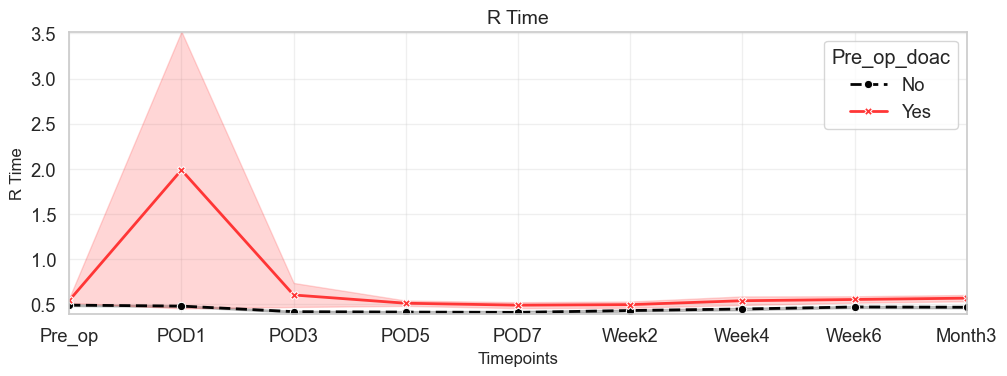

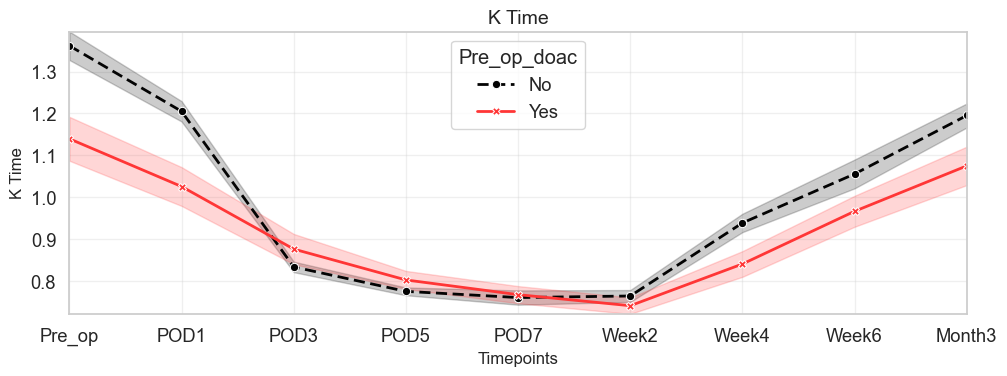

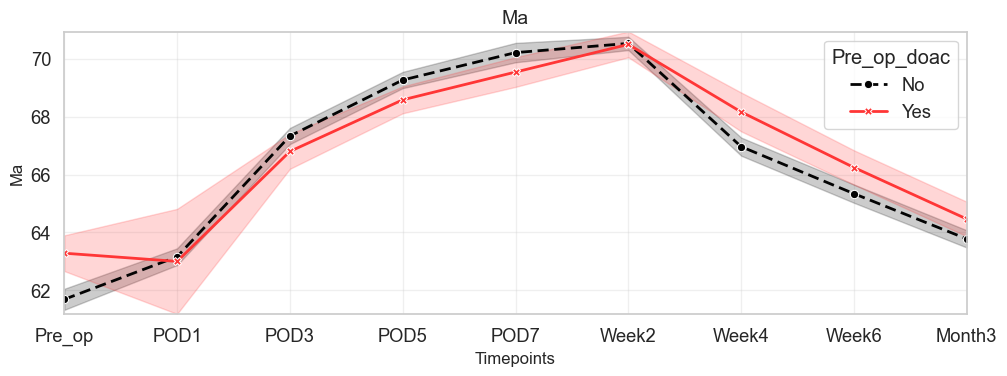

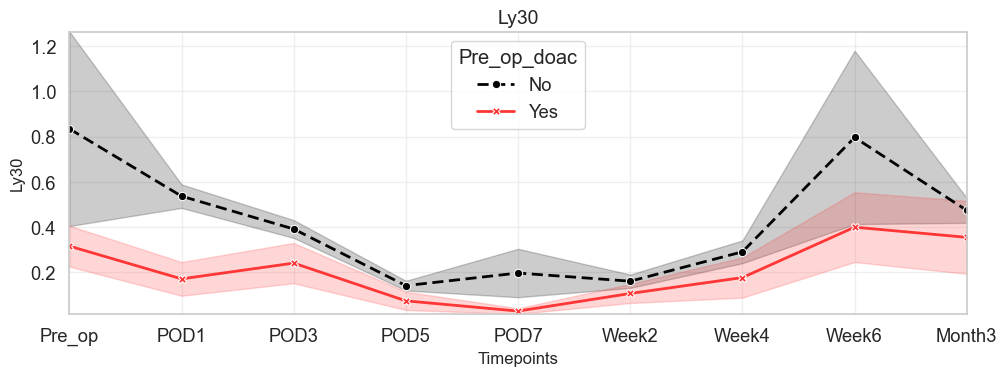

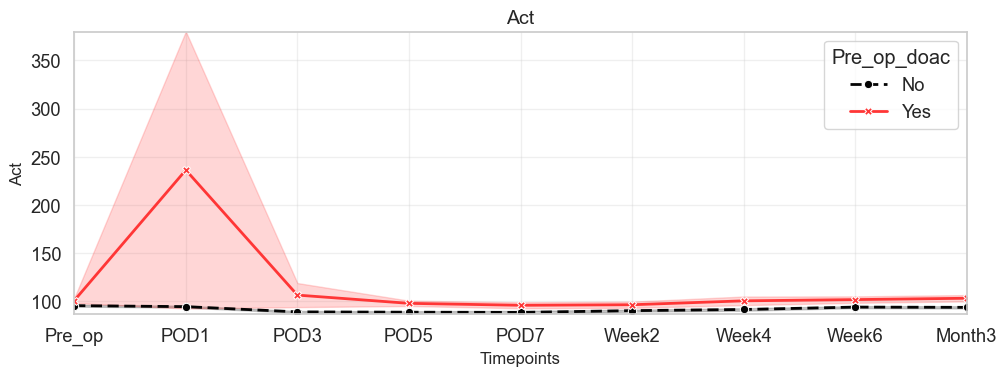

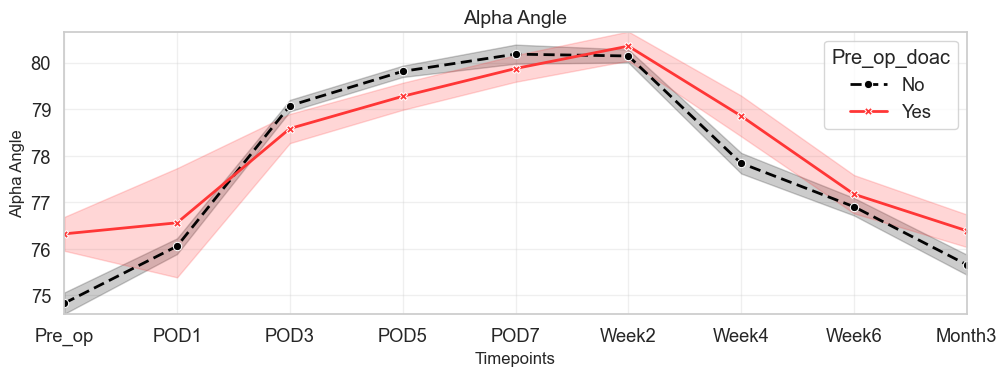

In [ ]:
for col in columns:
    df_blood_draws[col] = pd.to_numeric(df_blood_draws[col], errors='coerce')

    
plot_variables_over_time(df_blood_draws,
                         hue='Pre_op_doac', 
    style='Pre_op_doac',
    palette={'Yes':"#ff3636", 'No':"#030303"},
    
    # var_labels=var_labels,
    xlabel="Timepoints",
)

In [ ]:
# hip_blood[hip_blood['Time'].isin(['Admission','PFD1','PFD2','PFD3','PFD4'])]

In [ ]:



# project = Project(api_url, api_key)

# # Export all records directly (no report needed)
# records_data = project.export_records()  # returns list of dicts

# # Convert to DataFrame
# df = pd.DataFrame(records_data)

# # Convert to DataFrame
# df = pd.DataFrame(records_data)


# # Create Record objects from DataFrame
# record_objects = {}

# for _, row in df.iterrows():  # iterate over DataFrame rows
#     record_id = row['patient_id']  # use correct column name
#     if record_id not in record_objects:
#         record_objects[record_id] = Record(record_id)
    
#     draw_id = row['lab_dt_blood_draw']
#     if pd.notna(draw_id):  # only create BloodDraw if there is a timestamp
#         # Dynamically get lab columns
#         lab_columns = ['lab_rteg_timepoint','lp_hemoglobin', 'lp_creatinine', 'rteg_crt_rvalue', 
#                        'rteg_crt_ktime', 'rteg_crt_aangle', 'rteg_crt_ma',
#                        'rteg_crt_ly30', 'rteg_crt_tegact']
#         lab_data = {col: row[col] for col in lab_columns if pd.notna(row[col])}

#         blood_draw = BloodDraw(draw_id=draw_id, **lab_data)
#         record_objects[record_id].add_blood_draw(blood_draw)

# # ### Hip Pathway
# # load_dotenv()

# # # Retrieve environment variables
# # api_key = os.getenv("REDCAP_HIP_PATHWAY_API_KEY")
# # api_url = os.getenv("REDCAP_URL")

# # project = Project(api_url, api_key)

# # df2 = project.export_report(report_id="16762",format_type="df", raw_or_label='label',df_kwargs={"index_col": None}).reset_index(drop=True)  

In [ ]:
# df1_std = loader.prepare_dataframe(df1, add_med=True, add_vte=True)
# df2_std = loader.prepare_dataframe(df2, add_med=True, add_vte=True)

# # Merge
# merged_df = pd.concat([df1_std, df2_std], ignore_index=True)

In [ ]:
print('Total Number:', df.StudyID.nunique())

Total Number: 237


In [ ]:
merged_df['StudyID'].nunique()

NameError: name 'merged_df' is not defined

## Finding StudyIDs that do not have value at "Admission"

In [ ]:
# Find all StudyIDs with Admission
with_admission = merged_df.loc[merged_df['Time'] == 'Admission', 'StudyID'].unique()

# Find all StudyIDs
all_ids = merged_df['StudyID'].unique()

# Get the ones without Admission
without_admission = list(set(all_ids) - set(with_admission))

print(without_admission)


'''These patients withdrew and not much data available and should be excluded.''' 

In [ ]:
# merged_df= merged_df[merged_df['Time']!='nan'].copy()
merged_df = merged_df[merged_df['Time'].notna()].copy()

In [ ]:
merged_df['VTE'].value_counts(dropna=False)

## Asked Casandra to fix these duplicates

In [ ]:
df_ = merged_df[merged_df['Time']=='Admission']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
df_ = merged_df[merged_df['Time']=='POD5']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
df_ = merged_df[merged_df['Time']=='Week2']
df_[df_['StudyID'].duplicated(keep=False)][['StudyID','Hemoglobin','R_time',	'K_time',	'Alpha_Angle',	'MA',	'LY30',	'ACT','Draw_date','Time']]

In [ ]:
relevant_timepoints = ['Admission','Pre-Op','Pre-draw','PFD1','PFD2','PFD3','PFD4','4 hr Pre-OP']

hgb_drop_df = loader.compute_hb_drop(merged_df, relevant_timepoints=relevant_timepoints, timepoint_end='POD1')
display(hgb_drop_df.head())
print(len(hgb_drop_df))

print('These werent included in original file I gave to Prism:')
'''["TH-025","TH-033","TH-095","TH-156","TH-157","TH-175","TH-183","TH-196","TH-197","TH-199","TH-218","TH-230","TH-238","TH-263"]'''

In [ ]:
# Just looking at some of the values
merged_df[merged_df['StudyID']=='TH-095'][['StudyID','Time','hours_from_injury_to_bloodDraw','Hemoglobin','blood_draw_label','VTE']]

In [ ]:
columns = ['Age', 'Sex', 'BMI','VTE']
categorical = ['Sex','VTE']
nonnormal=['BMI']

subset_df = merged_df[(merged_df['Time'] == 'Admission')]
subset_df=subset_df.drop_duplicates(subset=['StudyID','Time'], keep='first')
  
subset_df
table1 = TableOne(
    subset_df,
    columns=columns,
    groupby='DOAC_status',
    categorical=categorical,
    nonnormal=nonnormal,
    normal_test=True
)


table1

In [ ]:
display(tb.table1(hgb_drop_df, columns=['Hb_Drop'],group='DOAC_status', nonnormal=[],categorical=[]))

plt.figure(figsize=(8,6))
sns.boxplot(x='DOAC_status', y='Hb_Drop', data=hgb_drop_df, palette='Set2')

# Overlay individual points
sns.stripplot(x='DOAC_status', y='Hb_Drop', data=hgb_drop_df, color='black', alpha=0.6, jitter=False)

# Labels
plt.title('Hemoglobin Drop: OAC vs Non-OAC')
plt.ylabel('Hemoglobin Drop (g/L)')
plt.xlabel('DOAC_status Group')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Only OACs

In [ ]:
hgb_drop_OAC = hgb_drop_df[hgb_drop_df['DOAC_status']=='OAC'].dropna(subset=['Hb_Drop'])

In [ ]:
hgb_drop_OAC['delta_Hgb'] = hgb_drop_OAC['POD1_Hgb'] - hgb_drop_OAC['first_draw_Hgb']
stat, p_val = wilcoxon(hgb_drop_OAC['first_draw_Hgb'], hgb_drop_OAC['POD1_Hgb'])
median_diff = hgb_drop_OAC['delta_Hgb'].median()


np.random.seed(200)
boot_medians = [
    np.median(np.random.choice(hgb_drop_OAC['delta_Hgb'], size=len(hgb_drop_OAC), replace=True))
    for _ in range(5000)
]
ci_lower, ci_upper = np.percentile(boot_medians, [2.5, 97.5])

# Put results in a DataFrame
results_df = pd.DataFrame({
    'Wilcoxon W': [stat],
    'p-value': [p_val],
    'Median Difference (POD1 - First)': [median_diff],
    '95% CI Lower': [ci_lower],
    '95% CI Upper': [ci_upper]
})

display(results_df)



df_long = hgb_drop_OAC.melt(value_vars=['first_draw_Hgb', 'POD1_Hgb'],
                       var_name='Timepoint', value_name='Hemoglobin')

# Set Seaborn style
sns.set_theme(style="whitegrid", font_scale=1.2)
custom_palette = ['#5DADE2', "#E4E73C"]  # Blue and red


plt.figure(figsize=(7, 5))
ax = sns.boxplot(
    data=df_long,
    x='Timepoint',
    y='Hemoglobin',
    palette=custom_palette,
    width=0.5,
    linewidth=1.5,
    fliersize=0
)
# Titles and labels
plt.title('Hemoglobin: First vs POD1', fontsize=14)
plt.ylabel('Hemoglobin (g/L)')
plt.xlabel('')
plt.tight_layout()

In [ ]:

merged_df['VTE']=np.where(merged_df['VTE'].isin(['PE','DVT','Both']), 'VTE','No VTE')
custom_order = ['Admission', 'POD1', 'POD3', 'POD5', 'Week2', 'Week4', 'Week6', 'Month3']
custom_palette = {'VTE': "#EE6F20", 'No VTE': 'black'}
variables = ['MA','R_time']

loader.plot_variables_over_time(df=merged_df, variables=variables,
                                custom_order=custom_order, 
                                hue='VTE', style='VTE',
                                custom_palette=custom_palette,
                                save_folder="plots")


In [ ]:
conditions = [
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] >= 0) & (merged_df['hours_from_injury_to_bloodDraw'] <= 24),
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] > 24) & (merged_df['hours_from_injury_to_bloodDraw'] <= 48),
    (merged_df['Time'].isin(['Admission','PFD 1','PFD 2','Pre-draw','4 hr Pre-OP '])) & (merged_df['hours_from_injury_to_bloodDraw'] > 48) & (merged_df['hours_from_injury_to_bloodDraw'] <= 72),



    (merged_df['Time'].isin(['POD 1','POD 3','POD 5','POD 7','2 week','4 week','6 week']) & (merged_df['hours_from_injury_to_bloodDraw'] >= 0) & (merged_df['hours_from_injury_to_bloodDraw'] <= 30)),
    (merged_df['Time'].isin(['POD 1','POD 3','POD 5','POD 7','2 week','4 week','6 week']) & (merged_df['hours_from_injury_to_bloodDraw'] > 48) & (merged_df['hours_from_injury_to_bloodDraw'] <= 78))
]

# Define corresponding labels
labels = [
    '0-24h post_injury',
    '25-48h post_injury',
    '49-72h post_injury',
    'POD1',
    'POD3'
]

# Apply classification
merged_df['time_classifications'] = np.select(conditions, labels, default='')